<a href="https://colab.research.google.com/github/Ananya-Kannan/AI_Sem_6_Lab/blob/main/AI_lab_exp_9_Random_Forest_exp_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings

warnings.filterwarnings('ignore')
# Load the Titanic dataset

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_data = pd.read_csv(url)

# Drop rows with missing target values

titanic_data = titanic_data.dropna(subset=['Survived'])

# Select relevant features and target variable

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

y = titanic_data['Survived']

# Convert categorical variable 'Sex' to numerical using .loc

X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Handle missing values in the 'Age' column using .loc

X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set

y_pred = rf_classifier.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

# Print the results

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_rep)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
pip install tensorflow


Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5396 - accuracy: 0.4388 - val_loss: 1.2484 - val_accuracy: 0.5489
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1501 - accuracy: 0.5928 - val_loss: 1.0651 - val_accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0010 - accuracy: 0.6486 - val_loss: 0.9806 - val_accuracy: 0.6538
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9095 - accuracy: 0.6788 - val_loss: 0.9355 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8365 - accuracy: 0.7079 - val_loss: 0.8923 - val_accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7813 - accuracy: 0.7275 - val_loss: 0.8831 - val_accuracy: 0.6894
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7401 - accuracy: 0.7417 - val_loss: 0.8716 -

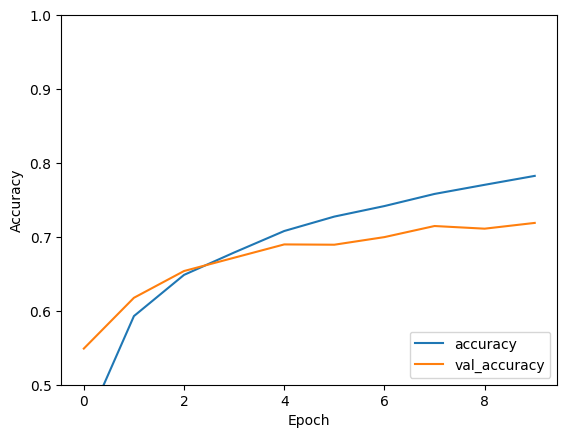

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7189000248908997
